In [1]:
import os 
import librosa 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

## visualize 

In [3]:
random_file_1 = "Data/genres_original/blues/blues.00000.wav"

In [4]:
y,sr = librosa.load(random_file_1 , sr = 44100)

In [5]:
y.shape

(1323588,)

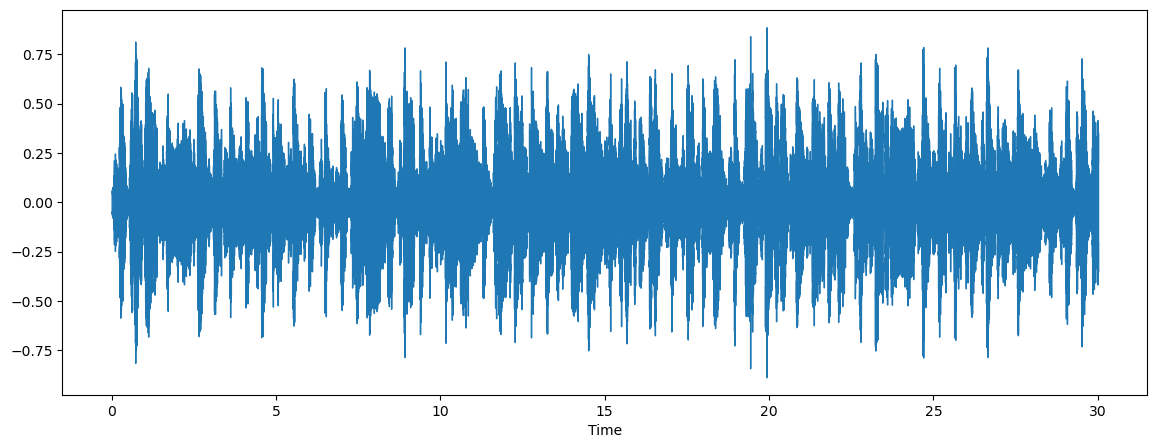

In [6]:
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr = sr)

In [7]:
from IPython.display import Audio
Audio(data =y, rate = sr)

In [8]:
random_file_2 = "Data/genres_original/country/country.00008.wav"

In [9]:
y,sr = librosa.load(random_file_2 , sr = 44100)

In [10]:
y.shape

(1327480,)

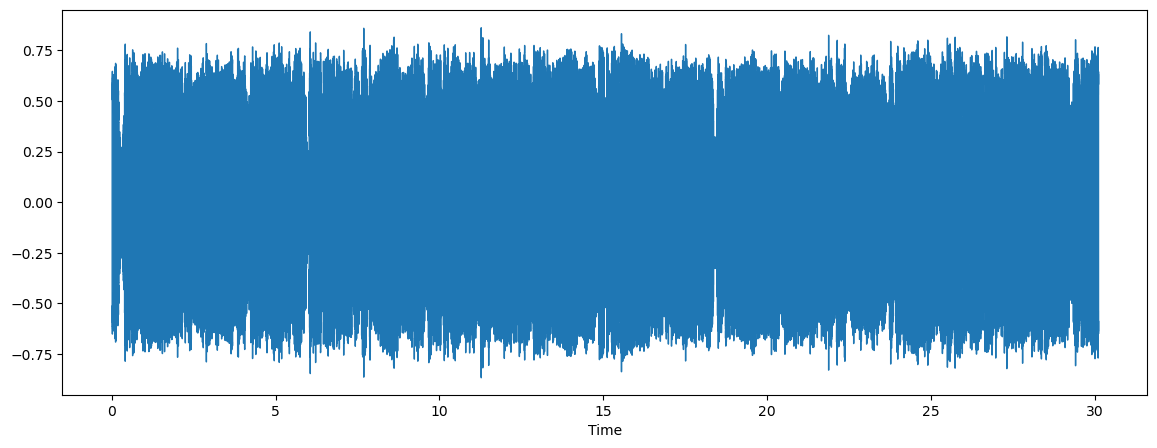

In [11]:
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr = sr)

In [12]:
Audio(data =y, rate = sr)

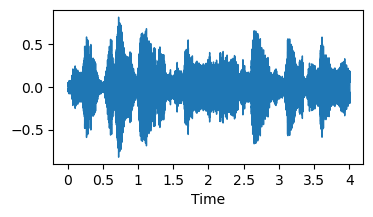

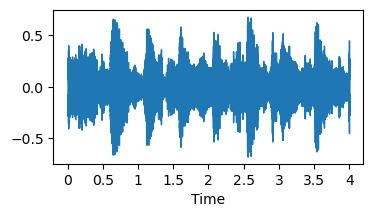

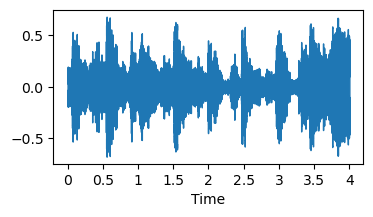

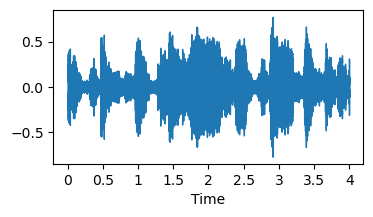

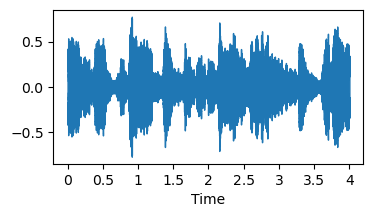

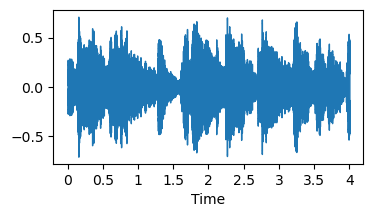

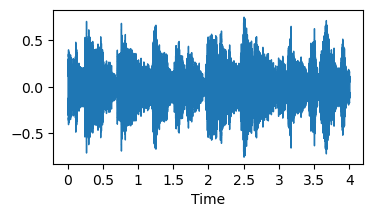

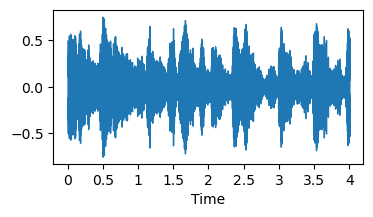

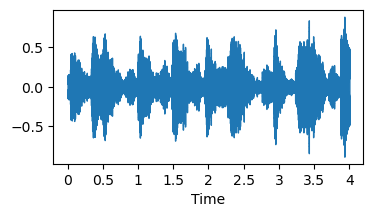

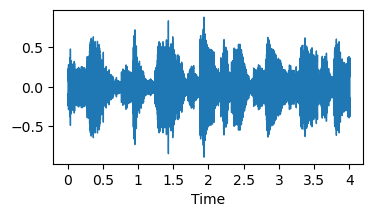

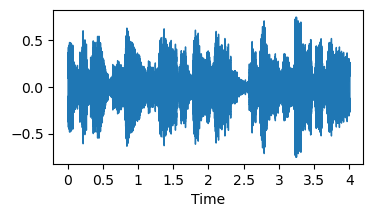

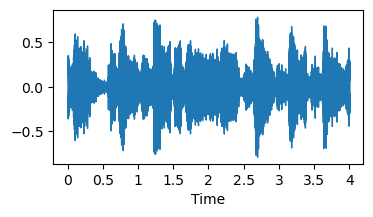

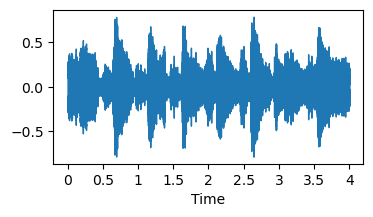

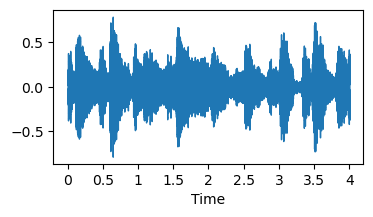

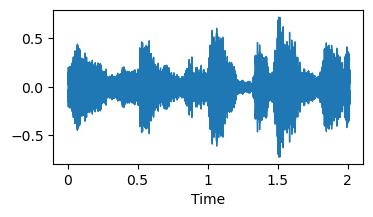

In [13]:
audio_path = "Data/genres_original/blues/blues.00000.wav"
y,sr = librosa.load(audio_path, sr = None)
# define the duration of chunk and overlap
chunk_duration = 4
overlap_duration = 2

#conver duration to sample 
chunk_sample = chunk_duration * sr
overlap_sample = overlap_duration * sr

#calculate the numble of chunks
num_chunks = int(np.ceil((len(y) - chunk_sample) / (chunk_sample - overlap_sample )))+1

#iterate over each chunk
for i in range(num_chunks):
    #calculate start and end indices of the chunk
    start = i* (chunk_sample - overlap_sample )
    end = start + chunk_sample 

    chunk = y[start:end]
    plt.figure(figsize =(4,2))
    librosa.display.waveshow(chunk,sr=sr)
    plt.show


## Melspectrogram visualize

In [15]:
def plot_melspectrogram (y,sr):
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

    #conver to decibels
    spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
    #visualize the spectrogram
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db ,sr=sr, x_axis = "time" , y_axis = "mel")
    plt.colorbar(format = "%2.0f dB") 
    plt.title("Spectrogram")
    plt.tight_layout()
    plt.show()
    

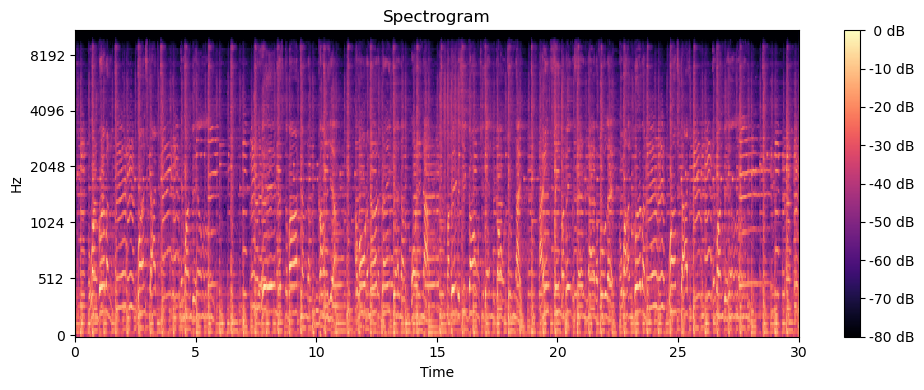

In [16]:
plot_melspectrogram(y,sr)

In [17]:
def plot_melspectrogram_chunks(y,sr):
    chunk_duration = 4
    overlap_duration = 2

    #conver duration to sample 
    chunk_sample = chunk_duration * sr
    overlap_sample = overlap_duration * sr

    #calculate the numble of chunks
    num_chunks = int(np.ceil((len(y) - chunk_sample) / (chunk_sample - overlap_sample )))+1

    #iterate over each chunk
    for i in range(num_chunks):
        #calculate start and end indices of the chunk
        start = i* (chunk_sample - overlap_sample )
        end = start + chunk_sample 

        chunk = y[start:end]

        spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
        spectrogram_db = librosa.power_to_db(spectrogram,ref=np.max)
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db ,sr=sr, x_axis = "time" , y_axis = "mel")
        plt.colorbar(format = "%2.0f dB") 
        plt.title("Spectrogram")
        plt.tight_layout()
        plt.show()

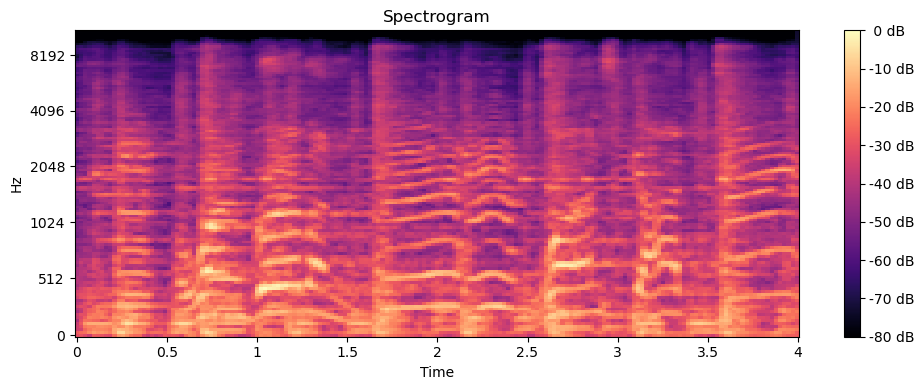

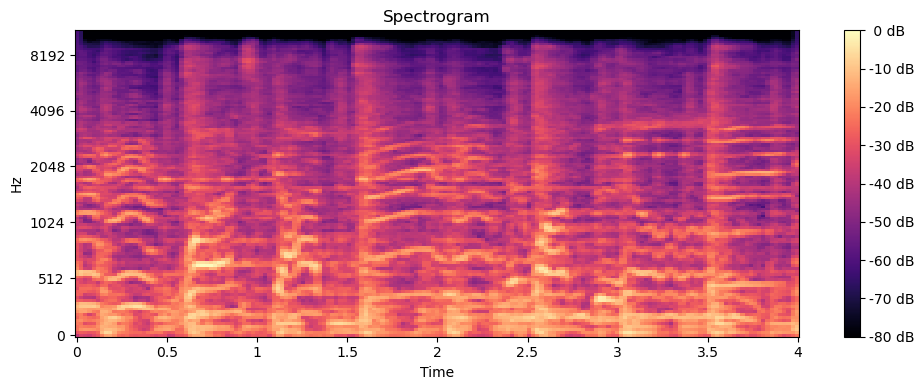

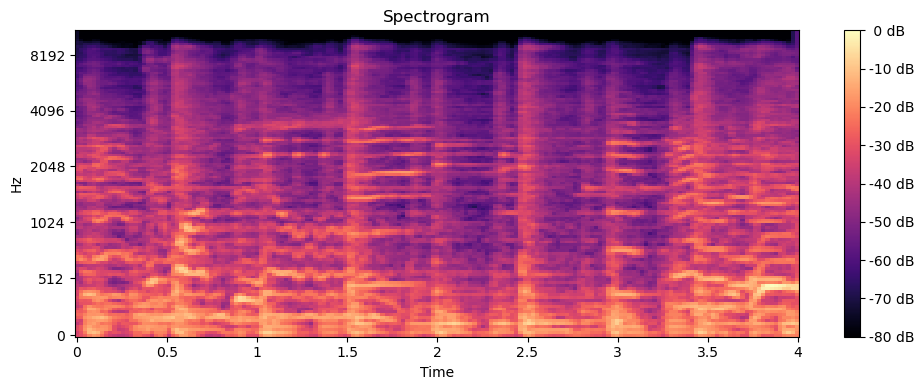

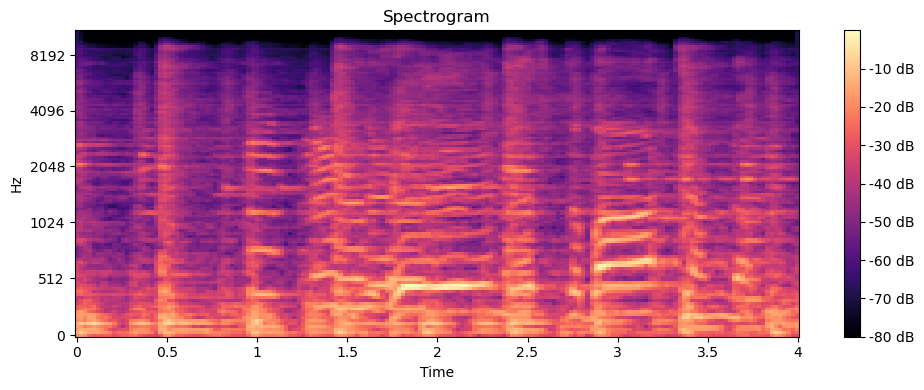

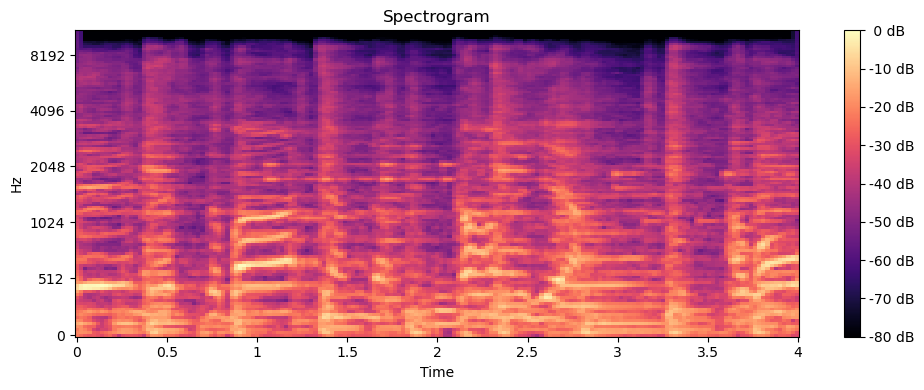

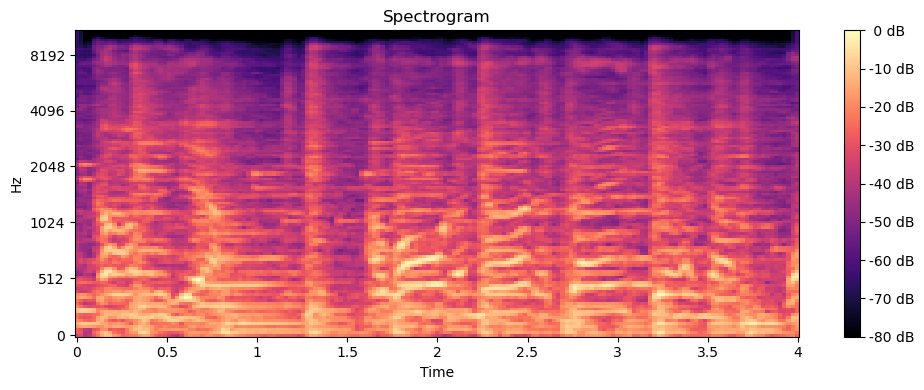

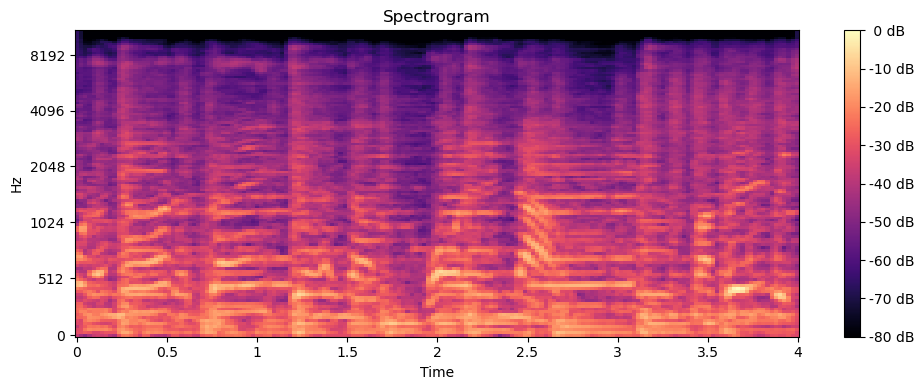

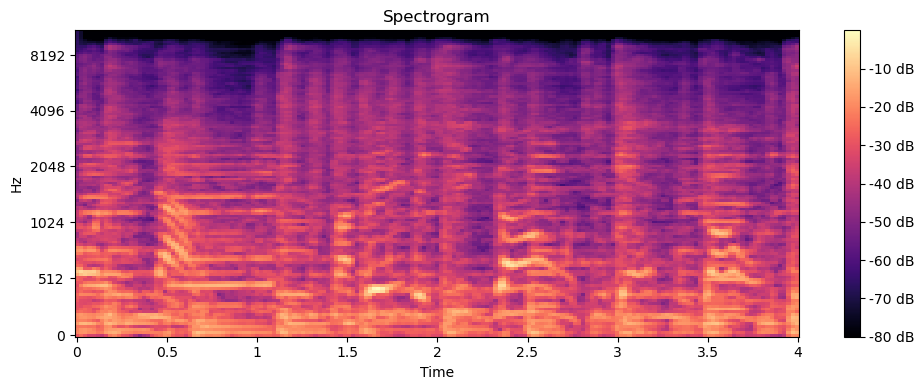

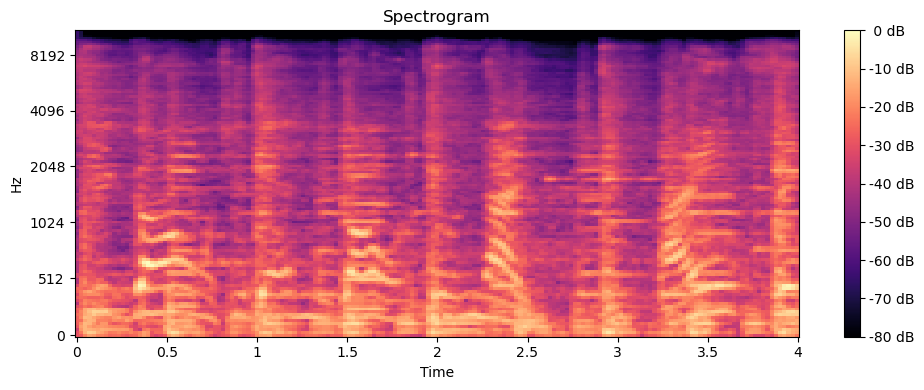

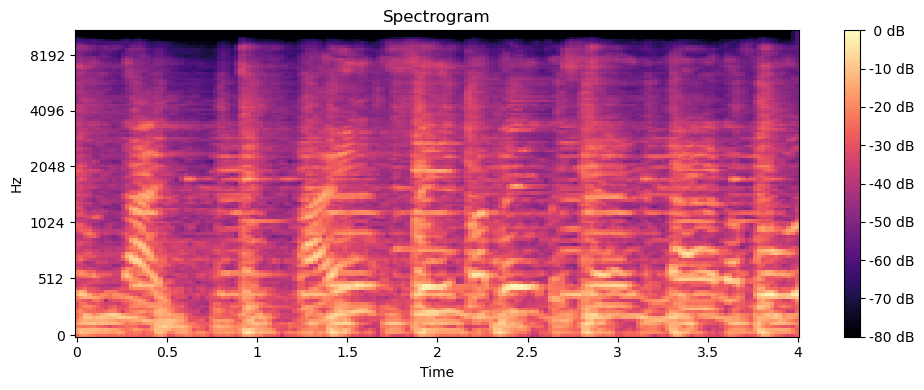

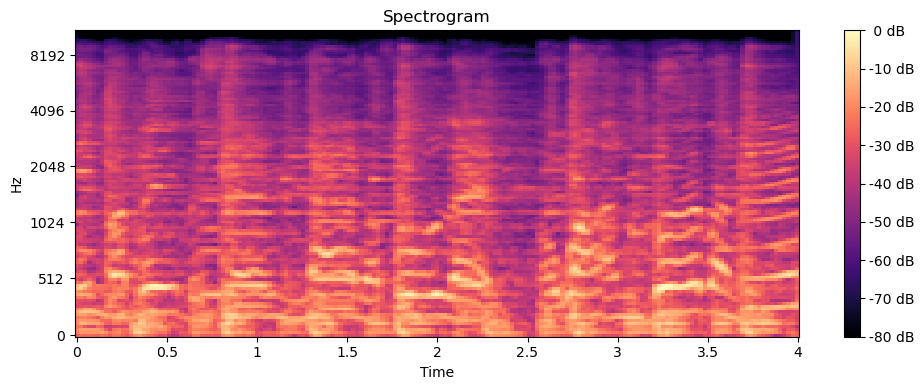

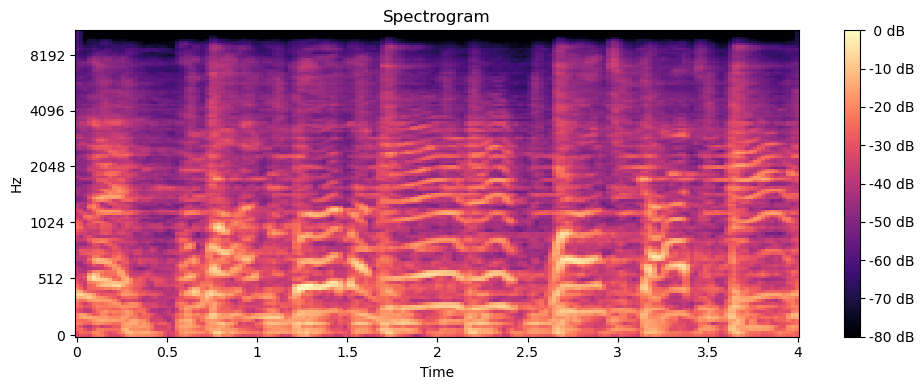

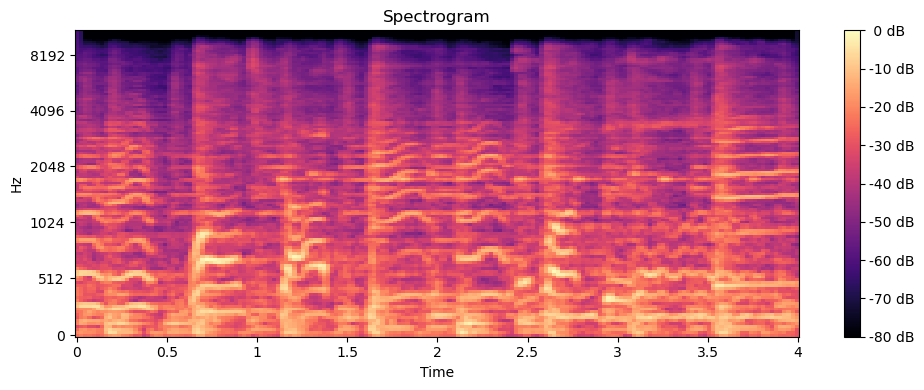

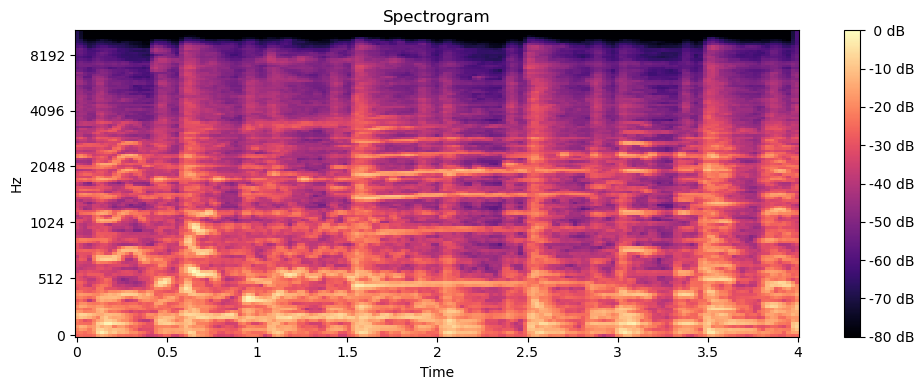

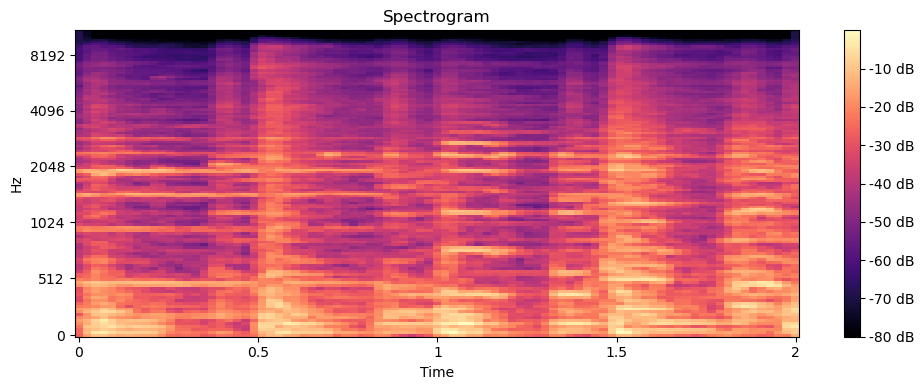

In [18]:
plot_melspectrogram_chunks(y,sr)

## Data Preprocessing

In [20]:
data_dir = "Data/genres_original"
classes = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [21]:
from tensorflow.image import resize
#load and preprocess audio data
def load_and_preprocess_data(data_dir,classes,target_shape=(150,150)):
    data=[]
    labels=[]

    for i_class,class_name in enumerate(classes):
        class_dir = os.path.join(data_dir,class_name)
        print("processing -- ",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir,filename)
                audio_data,sample_rate = librosa.load(file_path,sr = None )
                #performing preprocessing
                chunk_duration = 4
                overlap_duration = 2
                    #conver duration to sample 
                chunk_sample = chunk_duration * sample_rate
                overlap_sample = overlap_duration * sample_rate

                #calculate the numble of chunks
                num_chunks = int(np.ceil((len(y) - chunk_sample) / (chunk_sample - overlap_sample )))+1

                #iterate over each chunk
                for i in range(num_chunks):
                    #calculate start and end indices of the chunk
                    start = i* (chunk_sample - overlap_sample )
                    end = start + chunk_sample 

                    chunk = y[start:end]

                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sample_rate)
                    #resize matrix  to 150x150
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram,axis=-1),target_shape)
                    #append data to list
                    data.append(mel_spectrogram)
                    labels.append(i_class)
    return np.array(data),np.array(labels)

In [22]:
data,labels = load_and_preprocess_data(data_dir,classes)

processing --  blues
processing --  classical
processing --  country
processing --  disco
processing --  hiphop
processing --  jazz
processing --  metal
processing --  pop
processing --  reggae
processing --  rock


In [23]:
data.shape

(14985, 150, 150, 1)

In [24]:
labels.shape

(14985,)

In [25]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels,num_classes = len(classes))
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [26]:
labels.shape

(14985, 10)

## Splitting of Dataset to Training and Testing

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2, random_state=42)

In [29]:
X_train.shape

(11988, 150, 150, 1)

In [30]:
X_test.shape

(2997, 150, 150, 1)

In [31]:
Y_train.shape

(11988, 10)

In [32]:
Y_test.shape

(2997, 10)

## Building Model

In [34]:
model = tf.keras.models.Sequential()

In [35]:
X_train[0].shape

(150, 150, 1)

In [36]:
model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu",input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\phmqu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [38]:
model.add(Conv2D(filters=128,kernel_size=3,padding="same",activation="relu",input_shape=X_train[0].shape))
model.add(Conv2D(filters=128,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [39]:
model.add(Dropout(0.3))

In [40]:
model.add(Conv2D(filters=256,kernel_size=3,padding="same",activation="relu",input_shape=X_train[0].shape))
model.add(Conv2D(filters=256,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [41]:
model.add(Conv2D(filters=256,kernel_size=3,padding="same",activation="relu",input_shape=X_train[0].shape))
model.add(Conv2D(filters=256,kernel_size=3,activation="relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [42]:
model.add(Dropout(0.3))

In [43]:
model.add(Flatten())

In [44]:
model.add(Dense(units=1200,activation="relu"))

In [45]:
model.add(Dropout(0.45))

In [46]:
#output layer
model.add(Dense(units=len(classes),activation='softmax'))

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 148, 148, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 74, 74, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 17, 17, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1200)                │       1,230,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          12,010 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 3,593,850 (13.71 MB)

 Trainable params: 3,593,850 (13.71 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
#compile the model 
model.compile(optimizer=Adam(learning_rate=0.0001),loss= 'categorical_crossentropy',metrics=['accuracy'])

In [95]:
training_history = model.fit(X_train,Y_train,epochs=30,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 643s 2s/step - accuracy: 0.0862 - loss: 2.3302 - val_accuracy: 0.1001 - val_loss: 2.3037
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 567s 2s/step - accuracy: 0.0987 - loss: 2.3042 - val_accuracy: 0.0918 - val_loss: 2.3035
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 911s 2s/step - accuracy: 0.0949 - loss: 2.3032 - val_accuracy: 0.0961 - val_loss: 2.3060
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 567s 2s/step - accuracy: 0.0984 - loss: 2.3029 - val_accuracy: 0.0898 - val_loss: 2.3034
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 572s 2s/step - accuracy: 0.1000 - loss: 2.3027 - val_accuracy: 0.0944 - val_loss: 2.3034
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 566s 2s/step - accuracy: 0.1062 - loss: 2.3026 - val_accuracy: 0.0994 - val_loss: 2.3036
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 567s 2s/step - accuracy: 0.0986 - loss: 2.3026 - val_accuracy: 0.0921 - val_loss: 2.3035
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 572s 2s/step - accuracy: 0.0994 - loss: 2.3026 - val_accu